In [89]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.ion()

import altair as alt
import numpy as np

width = 600

# Load data

In [33]:
url_data = "https://github.com/jupyterhub/binder-data/raw/master/billing/data/proc/data.json"
data = pd.read_json(url_data, orient='split')
data['date'] = pd.to_datetime(data['date'])

# Cost by day

In [56]:
costs = data.groupby(['project_id', 'date']).sum()['cost']
costs = costs.reset_index()
weekly_costs = costs.groupby("project_id").resample("w", on="date").sum().reset_index()

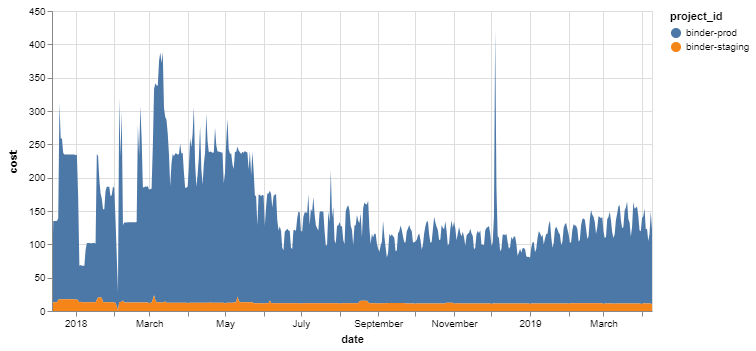

In [91]:
alt.Chart(data=costs.reset_index(), width=width).mark_area().encode(
    x="date",
    y="cost",
    color="project_id",
)

# Costs by week

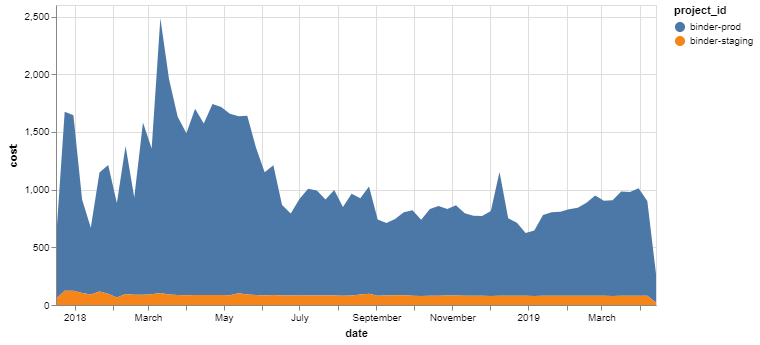

In [92]:
alt.Chart(data=weekly_costs, width=width).mark_area().encode(
    x="date",
    y="cost",
    color="project_id"
)

# Plot by category

In [85]:
categories = data.groupby(['date', 'category', 'line_item']).sum()['cost'].reset_index()
categories = categories.groupby(['date', 'category']).sum().reset_index()
categories['log_cost'] = categories['cost'].apply(np.log)

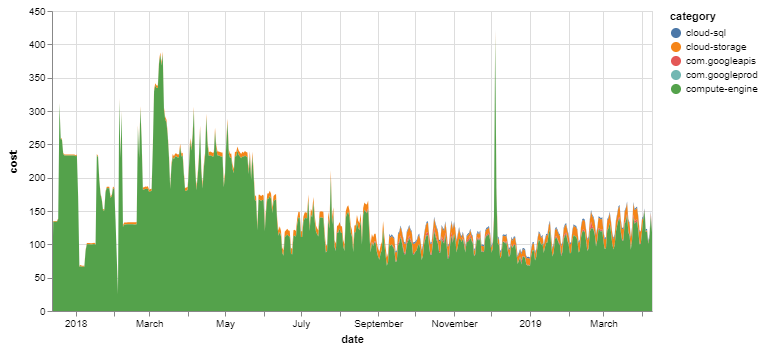

In [93]:
alt.Chart(data=categories, width=width).mark_area().encode(
    x="date",
    y="cost",
    color="category"
)

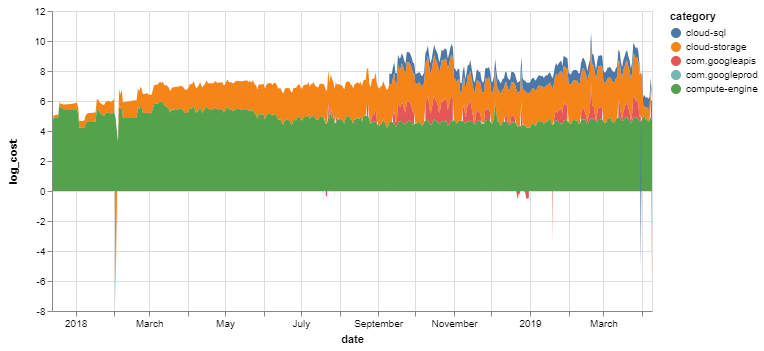

In [94]:
alt.Chart(data=categories, width=width).mark_area().encode(
    x="date",
    y="log_cost",
    color="category"
)